# TUGAS KECIL 2 - INTELIGENSI BUATAN

## Eksplorasi Scikit-Learn

## Anggota
### Gilang Ardyamandala Al Assyifa (13515096)
### Rio Dwi Putra Perkasa (13515012)

***
***

## A. Membaca Dataset

### Membaca dataset Iris dari sklearn.datasest

In [1]:
from sklearn import datasets

df_iris = datasets.load_iris()

print('Isi dataframe iris:')
for x in df_iris: print(x)

Isi dataframe iris:
data
feature_names
target_names
target
DESCR


In [2]:
print(df_iris.DESCR)
print()
print('Sampel data dan target')
print(df_iris.feature_names)
print(df_iris.data[:10])
print(df_iris.target_names)
print(df_iris.target[:10])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

### Membaca dataset play-tenis dari dataset eksternal (dalam .csv)

In [3]:
import pandas as pd

df_tennis = pd.read_csv('tennis.csv')

df_tennis

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


***
***
## MELAKUKAN PEMBELAJARAN
Pada tugas ini, algoritma yang digunakan untuk pembelajaran, antara lain:
- [Naive Bayes](http://scikit-learn.org/stable/modules/naive_bayes.html) (GaussianNB)
- [DecisionTree](http://scikit-learn.org/stable/modules/tree.html), catatan: default DTL pada sklearn.tree adalah Optimized CART, bukan ID3
- [kNN](http://scikit-learn.org/stable/modules/neighbors.html)
- [Neural Network MLP](http://scikit-learn.org/stable/modules/neural_networks_supervised.html)

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

## B. Pembelajaran dengan Skema _Full Training_
- Melakukan pembelajaran
- Menampilkan setiap modelnya
- Tidak disuruh menampilkan kinerjanya

In [5]:
X_train_full = df_iris.data
y_train_full = df_iris.target

### Gaussian Naive Bayes (GNB)

In [6]:
clf_GNB = GaussianNB()
clf_GNB.fit(X_train_full, y_train_full)

GaussianNB(priors=None)

### Model GNB

Prior probability
setosa: 0.333333333333
versicolor: 0.333333333333
virginica: 0.333333333333


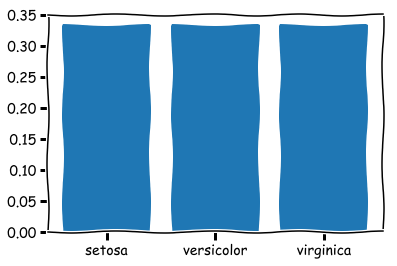

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xkcd()

print('Prior probability')
for i in range(3):
    print(df_iris.target_names[i] + ':', clf_GNB.class_prior_[i])
plt.bar([0,1,2], clf_GNB.class_prior_)
plt.xticks([0,1,2],df_iris.target_names)
plt.show()

In [8]:
from math import exp, sqrt, pi
import numpy as np

# Untuk mengeluarkan nilai gaussian
def gaussian(x, theta, sigma):
    return 1/sqrt(2*pi*sigma) * exp((-(x-theta)**2)/(2*sigma))

# Untuk menggambar grafik Gaussian
def model_gnb(lot, los, tar):
    print('Untuk kelas', df_iris.target_names[tar])
    print('Nilai theta')
    for j in range(4): print(df_iris.target_names[tar] + ' | ' + df_iris.feature_names[j] + ':', clf_GNB.theta_[tar][j])
    
    print('\nNilai sigma')
    for j in range(4): print(df_iris.target_names[tar] + ' | ' + df_iris.feature_names[j] + ':', clf_GNB.sigma_[tar][j])
    
    eks = list(np.arange(0.0, 8.0, 0.01))
    plt.xlabel('Nilai x pada fitur-i')
    plt.ylabel('Nilai gaussian')
    for feat in range(4):
        ye = [gaussian(elem, lot[tar][feat], los[tar][feat]) for elem in eks]
        plt.title('P(' + df_iris.target_names[tar] + ' | fitur-i)')
        plt.plot(eks, ye, label = df_iris.feature_names[feat])
    plt.legend(loc='upper right')
    plt.show()

Untuk kelas setosa
Nilai theta
setosa | sepal length (cm): 5.006
setosa | sepal width (cm): 3.418
setosa | petal length (cm): 1.464
setosa | petal width (cm): 0.244

Nilai sigma
setosa | sepal length (cm): 0.121764003092
setosa | sepal width (cm): 0.142276003092
setosa | petal length (cm): 0.0295040030924
setosa | petal width (cm): 0.0112640030924


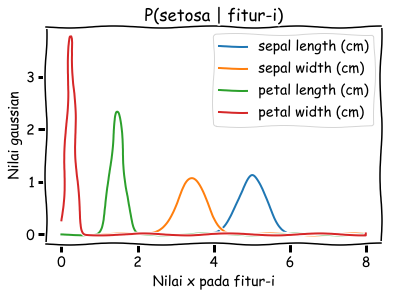

In [9]:
model_gnb(clf_GNB.theta_, clf_GNB.sigma_, 0)

Untuk kelas versicolor
Nilai theta
versicolor | sepal length (cm): 5.936
versicolor | sepal width (cm): 2.77
versicolor | petal length (cm): 4.26
versicolor | petal width (cm): 1.326

Nilai sigma
versicolor | sepal length (cm): 0.261104003092
versicolor | sepal width (cm): 0.0965000030924
versicolor | petal length (cm): 0.216400003092
versicolor | petal width (cm): 0.0383240030924


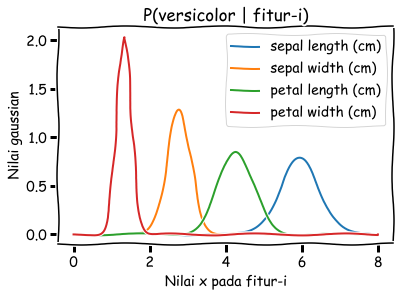

In [10]:
model_gnb(clf_GNB.theta_, clf_GNB.sigma_, 1)

Untuk kelas virginica
Nilai theta
virginica | sepal length (cm): 6.588
virginica | sepal width (cm): 2.974
virginica | petal length (cm): 5.552
virginica | petal width (cm): 2.026

Nilai sigma
virginica | sepal length (cm): 0.396256003092
virginica | sepal width (cm): 0.101924003092
virginica | petal length (cm): 0.298496003092
virginica | petal width (cm): 0.0739240030924


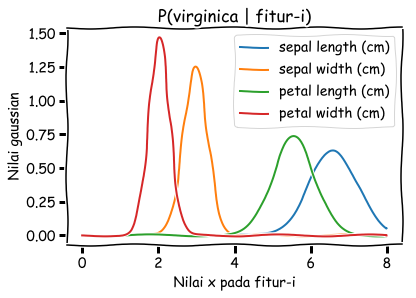

In [11]:
model_gnb(clf_GNB.theta_, clf_GNB.sigma_, 2)

### DecisionTree CART

Perhatikan bahwa DTL pada sklearn.tree adalah CART, bukan ID3.

Classifier ini menggunakan konfigurasi criterion='entropy' agar lebih mirip dengan ID3 (dibanging criterion='gini')

In [12]:
clf_DT = tree.DecisionTreeClassifier(criterion='entropy')
clf_DT.fit(X_train_full, y_train_full)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Model DecisionTree

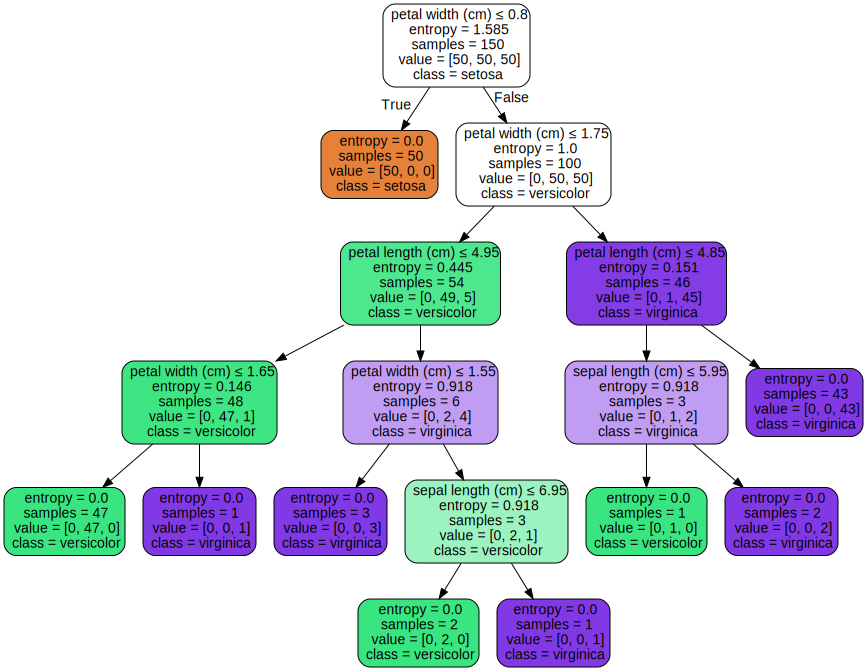

In [13]:
import graphviz

dot_data = tree.export_graphviz(clf_DT, out_file=None, 
                         feature_names=df_iris.feature_names,  
                         class_names=df_iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

### K Nearest Neighbors (KNN)

Dengan K = 5

In [14]:
clf_KNN = KNeighborsClassifier()
clf_KNN.fit(X_train_full, y_train_full)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Model KNN

Tidak ada

### Multilayer Perceptron (MLP)

default configuration

In [15]:
clf_MLP = MLPClassifier(hidden_layer_sizes=(10,))
clf_MLP.fit(X_train_full, y_train_full)

/home/gilang20/anaconda3/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

### Model MLP

In [16]:
print('Weight')
print(clf_MLP.coefs_)

print()
print('Loss')
print(clf_MLP.loss_curve_)

Weight
[array([[  5.20784970e-01,   4.60285762e-01,   2.83164461e-01,
         -5.64594688e-02,   3.75719547e-02,   5.19286300e-01,
          3.54356662e-04,   8.95836363e-03,   3.70065751e-01,
         -9.74668499e-02],
       [ -2.75374730e-01,   5.29397619e-01,   5.76636481e-01,
          4.77814551e-01,  -6.74433847e-02,   3.40232985e-01,
         -3.08113833e-01,   5.68589080e-01,  -4.41450600e-01,
          5.59329418e-02],
       [ -4.94994947e-01,   6.37106885e-01,  -8.05642508e-02,
         -7.69774480e-01,  -2.43867721e-01,   2.99185047e-01,
          1.17236231e-01,  -3.07297895e-01,   5.47922300e-01,
          3.49089561e-01],
       [  1.91346872e-01,   3.45772072e-01,  -6.83267199e-01,
         -5.39049914e-01,  -4.82072480e-01,  -4.55863449e-01,
         -4.41557547e-01,  -2.96734430e-01,   1.16108764e-01,
          3.52514922e-01]]), array([[-0.47089794,  0.0281882 , -0.05611221],
       [-0.28429539,  0.41278706,  0.24832723],
       [-0.08487305, -0.31931439, -0.54865

***
***

## C. Pembelajaran dengan Skema 90:10

### Persiapan untuk melakukan split dan menggambar visualisasi confusion matrix

In [17]:
import itertools
from sklearn import metrics
from sklearn.model_selection import train_test_split

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
#     print(cm)
#     plt.xkcd()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def kinerja(y_test, y_predict, title):
    print("Akurasi: {0:.4f}".format(metrics.accuracy_score(y_test, y_predict)))
    print()
    print("Classification Report")
    print(metrics.classification_report(y_test, y_predict, target_names=df_iris.target_names))
    print()
    plt.figure()
    # print(metrics.confusion_matrix(y_test, y_predict, labels=[0,1,2]))
    plot_confusion_matrix(metrics.confusion_matrix(y_test, y_predict), classes=df_iris.target_names, 
                          title= title + ' Confusion Matrix')
    plt.show()

### Split Dataset, 90% Train : 10% Test

In [18]:
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(df_iris.data, df_iris.target, test_size=0.1)

### Gaussian Naive Bayes (GNB)

In [19]:
clf_GNB_90 = GaussianNB()
clf_GNB_90.fit(X_train_90, y_train_90)

GaussianNB(priors=None)

### Kinerja dan Confusion Matrix GNB

Akurasi: 0.9333

Classification Report
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         6
 versicolor       0.80      1.00      0.89         4
  virginica       1.00      0.80      0.89         5

avg / total       0.95      0.93      0.93        15




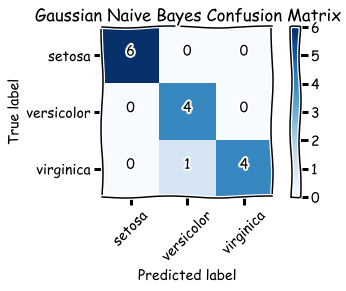

In [20]:
kinerja(y_test_90, clf_GNB_90.predict(X_test_90), 'Gaussian Naive Bayes')

### DecisionTree

In [21]:
clf_DT_90 = tree.DecisionTreeClassifier(criterion='entropy')
clf_DT_90.fit(X_train_90, y_train_90)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Kinerja dan Confusion Matrix DecisionTree

Akurasi: 0.8667

Classification Report
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         6
 versicolor       0.75      0.75      0.75         4
  virginica       0.80      0.80      0.80         5

avg / total       0.87      0.87      0.87        15




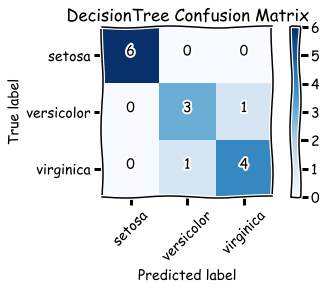

In [22]:
kinerja(y_test_90, clf_DT_90.predict(X_test_90), 'DecisionTree')

### K Nearest Neighbors

In [23]:
clf_KNN_90 = KNeighborsClassifier(n_neighbors=1)
clf_KNN_90.fit(X_train_90, y_train_90)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Kinerja dan Confusion Matrix kNN

Akurasi: 0.8667

Classification Report
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         6
 versicolor       0.75      0.75      0.75         4
  virginica       0.80      0.80      0.80         5

avg / total       0.87      0.87      0.87        15




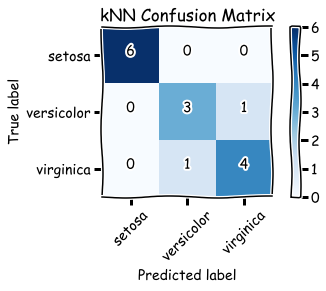

In [24]:
kinerja(y_test_90, clf_KNN_90.predict(X_test_90), 'kNN')

### Multilayer Perceptron (MLP)

In [25]:
clf_MLP_90 = MLPClassifier()
clf_MLP_90.fit(X_train_90, y_train_90)

/home/gilang20/anaconda3/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

### Kinerja dan Confusion Matrix MLP

Akurasi: 0.9333

Classification Report
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         6
 versicolor       1.00      0.75      0.86         4
  virginica       0.83      1.00      0.91         5

avg / total       0.94      0.93      0.93        15




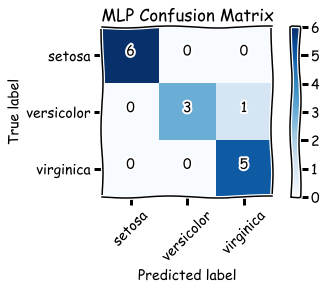

In [26]:
kinerja(y_test_90, clf_MLP_90.predict(X_test_90), 'MLP')

***
***

## D. Pembelajaran dengan Skema 10-Folds Cross Validation

### Menyiapkan Classifier

In [27]:
# Classifier
clf_GNB_kf = GaussianNB()
clf_DT_kf = tree.DecisionTreeClassifier(criterion='entropy')
clf_KNN_kf = KNeighborsClassifier()
clf_MLP_kf = MLPClassifier()

### Melakukan Pembelajaran dengan Skema 10-Folds CV

In [28]:
from sklearn.model_selection import KFold

kf = KFold(10, shuffle=True)
kf

KFold(n_splits=10, random_state=None, shuffle=True)

In [29]:
# Kontainer Metrik Kinerja
clf_GNB_kf_acc = []
clf_GNB_kf_prec = []
clf_GNB_kf_rec = []
clf_GNB_kf_f1 = []

clf_DT_kf_acc = []
clf_DT_kf_prec = []
clf_DT_kf_rec = []
clf_DT_kf_f1 = []

clf_KNN_kf_acc = []
clf_KNN_kf_prec = []
clf_KNN_kf_rec = []
clf_KNN_kf_f1 = []

clf_MLP_kf_acc = []
clf_MLP_kf_prec = []
clf_MLP_kf_rec = []
clf_MLP_kf_f1 = []

for train_index, test_index in kf.split(X_train_full):
#     print("TRAIN:", train_index, '\n', "TEST:", test_index, '\n\n')
    X_train, X_test = X_train_full[train_index], X_train_full[test_index]
    y_train, y_test = y_train_full[train_index], y_train_full[test_index]
    
    clf_GNB_kf.fit(X_train, y_train)
    y_test_predict_GNB = clf_GNB_kf.predict(X_test)
    clf_GNB_kf_acc.append(metrics.accuracy_score(y_test, y_test_predict_GNB))
    clf_GNB_kf_prec.append(metrics.precision_score(y_test, y_test_predict_GNB, average='macro'))
    clf_GNB_kf_rec.append(metrics.recall_score(y_test, y_test_predict_GNB, average='macro'))
    clf_GNB_kf_f1.append(metrics.f1_score(y_test, y_test_predict_GNB, average='macro'))
    
    clf_DT_kf.fit(X_train, y_train)
    y_test_predict_DT = clf_DT_kf.predict(X_test)
    clf_DT_kf_acc.append(metrics.accuracy_score(y_test, y_test_predict_DT))
    clf_DT_kf_prec.append(metrics.precision_score(y_test, y_test_predict_DT, average='macro'))
    clf_DT_kf_rec.append(metrics.recall_score(y_test, y_test_predict_DT, average='macro'))
    clf_DT_kf_f1.append(metrics.f1_score(y_test, y_test_predict_DT, average='macro'))
    
    clf_KNN_kf.fit(X_train, y_train)
    y_test_predict_KNN = clf_KNN_kf.predict(X_test)
    clf_KNN_kf_acc.append(metrics.accuracy_score(y_test, y_test_predict_KNN))
    clf_KNN_kf_prec.append(metrics.precision_score(y_test, y_test_predict_KNN, average='macro'))
    clf_KNN_kf_rec.append(metrics.recall_score(y_test, y_test_predict_KNN, average='macro'))
    clf_KNN_kf_f1.append(metrics.f1_score(y_test, y_test_predict_KNN, average='macro'))
    
    clf_MLP_kf.fit(X_train, y_train)
    y_test_predict_MLP = clf_MLP_kf.predict(X_test)
    clf_MLP_kf_acc.append(metrics.accuracy_score(y_test, y_test_predict_MLP))
    clf_MLP_kf_prec.append(metrics.precision_score(y_test, y_test_predict_MLP, average='macro'))
    clf_MLP_kf_rec.append(metrics.recall_score(y_test, y_test_predict_MLP, average='macro'))
    clf_MLP_kf_f1.append(metrics.f1_score(y_test, y_test_predict_MLP, average='macro'))

/home/gilang20/anaconda3/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Kinerja Model

In [30]:
print('GNB')
print('Rerata akurasi:', np.mean(clf_GNB_kf_acc))
print('Rerata presisi:', np.mean(clf_GNB_kf_prec))
print('Rerata recall:', np.mean(clf_GNB_kf_rec))
print('Rerata f1-score:', np.mean(clf_GNB_kf_f1))

print()
print('DT')
print('Rerata akurasi:', np.mean(clf_DT_kf_acc))
print('Rerata presisi:', np.mean(clf_DT_kf_prec))
print('Rerata recall:', np.mean(clf_DT_kf_rec))
print('Rerata f1-score:', np.mean(clf_DT_kf_f1))

print()
print('KNN')
print('Rerata akurasi:', np.mean(clf_KNN_kf_acc))
print('Rerata presisi:', np.mean(clf_KNN_kf_prec))
print('Rerata recall:', np.mean(clf_KNN_kf_rec))
print('Rerata f1-score:', np.mean(clf_KNN_kf_f1))

print()
print('MLP')
print('Rerata akurasi:', np.mean(clf_MLP_kf_acc))
print('Rerata presisi:', np.mean(clf_MLP_kf_prec))
print('Rerata recall:', np.mean(clf_MLP_kf_rec))
print('Rerata f1-score:', np.mean(clf_MLP_kf_f1))

GNB
Rerata akurasi: 0.953333333333
Rerata presisi: 0.948518518519
Rerata recall: 0.948055555556
Rerata f1-score: 0.946107998755

DT
Rerata akurasi: 0.953333333333
Rerata presisi: 0.953055555556
Rerata recall: 0.95246031746
Rerata f1-score: 0.948691308691

KNN
Rerata akurasi: 0.966666666667
Rerata presisi: 0.961666666667
Rerata recall: 0.966626984127
Rerata f1-score: 0.962236282236

MLP
Rerata akurasi: 0.966666666667
Rerata presisi: 0.965555555556
Rerata recall: 0.966626984127
Rerata f1-score: 0.961851481851


## E. Menyimpan Model ke File Eksternal
Dalam kasus ini model yang akan disimpan adalah model dari Gaussian Naive Bayes dengan skema full training

In [31]:
from sklearn.externals import joblib

In [32]:
joblib.dump(clf_GNB, 'GNB.model')

['GNB.model']

## F. Membaca Model dari File Eksternal

In [33]:
loaded_model = joblib.load('GNB.model')

## G. Membuat Instance Baru

In [34]:
instance_baru = [[2.1, 2.1, 0.2, 0.2],
                 [0.2, 4.0, 1.1, 1.2],
                 [1.2, 2.2, 5.6, 7.1],
                 [1.3, 3.5, 4.6, 1.1],
                 [1.2, 0.2, 0.6, 2.1]]

## H. Melakukan Klasifikasi terhadap Instance Baru
Model yang digunakan untuk klasifikasi kali ini adalah model yang dibentuk dengan skema Full Training

In [35]:
def klas(i): return df_iris.target_names[i]

hasil_GNB = clf_GNB.predict(instance_baru)
hasil_DT = clf_DT.predict(instance_baru)
hasil_KNN = clf_KNN.predict(instance_baru)
hasil_MLP = clf_MLP.predict(instance_baru)

for i in range(len(instance_baru)):
    print(instance_baru[i])
    print('GNB           :', klas(hasil_GNB[i]))
    print('Decision Tree :', klas(hasil_DT[i]))
    print('KNN           :', klas(hasil_KNN[i]))
    print('MLP           :', klas(hasil_MLP[i]))
    print()

[2.1, 2.1, 0.2, 0.2]
GNB           : setosa
Decision Tree : setosa
KNN           : setosa
MLP           : versicolor

[0.2, 4.0, 1.1, 1.2]
GNB           : versicolor
Decision Tree : versicolor
KNN           : setosa
MLP           : setosa

[1.2, 2.2, 5.6, 7.1]
GNB           : virginica
Decision Tree : virginica
KNN           : virginica
MLP           : virginica

[1.3, 3.5, 4.6, 1.1]
GNB           : virginica
Decision Tree : versicolor
KNN           : versicolor
MLP           : virginica

[1.2, 0.2, 0.6, 2.1]
GNB           : versicolor
Decision Tree : versicolor
KNN           : setosa
MLP           : virginica

